# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [73]:
import math
import sys

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [75]:
# YOUR CODE HERE
url = 'https://github.com/EpistasisLab/pmlb/raw/master/datasets/_deprecated_breast_cancer_wisconsin/_deprecated_breast_cancer_wisconsin.tsv.gz'
df = pd.read_csv(url, sep='\t')

In [76]:
df.head(10)

,target,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  569 non-null    int64  
 1   2       569 non-null    float64
 2   3       569 non-null    float64
 3   4       569 non-null    float64
 4   5       569 non-null    float64
 5   6       569 non-null    float64
 6   7       569 non-null    float64
 7   8       569 non-null    float64
 8   9       569 non-null    float64
 9   10      569 non-null    float64
 10  11      569 non-null    float64
 11  12      569 non-null    float64
 12  13      569 non-null    float64
 13  14      569 non-null    float64
 14  15      569 non-null    float64
 15  16      569 non-null    float64
 16  17      569 non-null    float64
 17  18      569 non-null    float64
 18  19      569 non-null    float64
 19  20      569 non-null    float64
 20  21      569 non-null    float64
 21  22      569 non-null    float64
 22  23

This is a random sample of 10 rows from the dataset. 

In [78]:
df.sample(n=10)

,target,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
374,0,13.690,16.07,87.84,579.1,0.08302,0.06374,0.02556,0.02031,0.1872,...,14.84,20.21,99.16,670.6,0.1105,0.2096,0.1346,0.06987,0.3323,0.07701
16,1,14.680,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.2914,0.16090,0.3029,0.08216
213,1,17.420,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,...,18.07,28.07,120.40,1021.0,0.1243,0.1793,0.2803,0.10990,0.1603,0.06818
229,1,12.830,22.33,85.26,503.2,0.10880,0.17990,0.16950,0.06861,0.2123,...,15.20,30.15,105.30,706.0,0.1777,0.5343,0.6282,0.19770,0.3407,0.12430
540,0,11.540,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134
100,1,13.610,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,...,16.99,35.27,108.60,906.5,0.1265,0.1943,0.3169,0.11840,0.2651,0.07397
176,0,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,0.1669,...,11.26,24.39,73.07,390.2,0.1301,0.2950,0.3486,0.09910,0.2614,0.11620
501,1,13.820,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,...,16.01,32.94,106.00,788.0,0.1794,0.3966,0.3381,0.15210,0.3651,0.11830
469,0,11.620,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.05564,0.1957,...,13.36,25.40,88.14,528.1,0.1780,0.2878,0.3186,0.14160,0.2660,0.09270
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368


This gives a random sample of 10 rows in the dataset. 

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [79]:
# YOUR CODE HERE
df.columns

Index(['target', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31'],
      dtype='object')

The dataset contains 30 features derived from digitalized images of breat mass FNAs(fine needle aspirate).  features describe characteristics of cell nuclei in the images. 

All of the base measurements are calculated in three ways: mean, standard error, and "worst"
<br>The 32 columns in the dataset include the following:
> 1. ID Number of Each Indiviudal
> 2. The diagnosis of breast tissue (1 = malignant/cancerous, 0 = benign/non-concerous)

> 3. Radius Mean (average distance from the center of the cell nucleus to points on the perimeter)
> 4. Texture mean (average standard deviation of gray-scale values in image)
> 5. Perimeter mean (average length around boundary of cell nucleus)
> 6. Area mean (average cross-sectional area of the cell nucleus)
> 7. Smoothness mean (average local variations in radius length around the nucleus)
> 8. Compactness mean (average Perimeter^2/Area - 1 which measures how compact or circular the nucleus shape is)
> 9. Concavity mean (average of severity of concave portions of the nucleus contour)
> 10. Concave points mean (average number of cancave points along the contour)
> 11. Symmetry mean (average measure of regularity of the nuclear shape)
> 12. Fractional dimension mean (average "coastline approximation" which measures complexity and irregularity of nucleus boundary)

> 13. Radius SE (standard error distance from the center of the cell nucleus to points on the perimeter)
> 14. Texture SE (standard error of standard deviation of gray-scale values in image)
> 15. Perimeter SE (standard error of length around boundary of cell nucleus)
> 16. Area SE (standard error of cross-sectional area of the cell nucleus)
> 17. Smoothness SE (standard error of local variations in radius length around the nucleus)
> 18. Compactness SE (standard error of Perimeter^2/Area - 1 which measures how compact or circular the nucleus shape is)
> 19. Concavity SE (standard error of severity of concave portions of the nucleus contour)
> 20. Concave Points SE (standard error of the number of concave points along the contour)
> 21. Symmetry SE (standard error of measure of regularity of the nuclear shape)
> 22. Fractional Dimension SE  (standard error of "coastline approximation" which measures complexity and irregularity of nucleus boundary)

> 23. Radius Worst ("worst" distance from the center of the cell nucleus to points on the perimeter)
> 24. Texture Worst ("wrost" of standard deviation of gray-scale values in imag)
> 25. Perimeter Worst ("worst"of length around boundary of cell nucleus)
> 26. Area Worst ("worst" of cross-sectional area of the cell nucleus)
> 27. Smoothness Worst ("worst "of local variations in radius length around the nucleus)
> 28. Compactness Worst ("worst" of Perimeter^2/Area - 1 which measures how compact or circular the nucleus shape is)
> 29. Concavity Worst ("worst "of severity of concave portions of the nucleus contour)
> 30. Concave Points Worst ("worst" of the number of concave points along the contour)
> 31. Symmetry Worst ("worst" of measure of regularity of the nuclear shape)
> 32. Fractal Dimension Worst ("worst" of "coastline approximation" which measures complexity and irregularity of nucleus boundary)

Standard error - Measures variability of the mesaurements <br>
Worst - mean of the three largest (most extreme values for each measurement)

In [80]:
# Rename all columns with descriptive names
df.columns = [
    'diagnosis',
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'concave_points_mean',
    'symmetry_mean',
    'fractal_dimension_mean',
    'radius_se',
    'texture_se',
    'perimeter_se',
    'area_se',
    'smoothness_se',
    'compactness_se',
    'concavity_se',
    'concave_points_se',
    'symmetry_se',
    'fractal_dimension_se',
    'radius_worst',
    'texture_worst',
    'perimeter_worst',
    'area_worst',
    'smoothness_worst',
    'compactness_worst',
    'concavity_worst',
    'concave_points_worst',
    'symmetry_worst',
    'fractal_dimension_worst'
]

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

In [81]:
from scipy.stats import skew

array([[<Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave_points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave_points_se'}>,
        <Axes: title={'cent

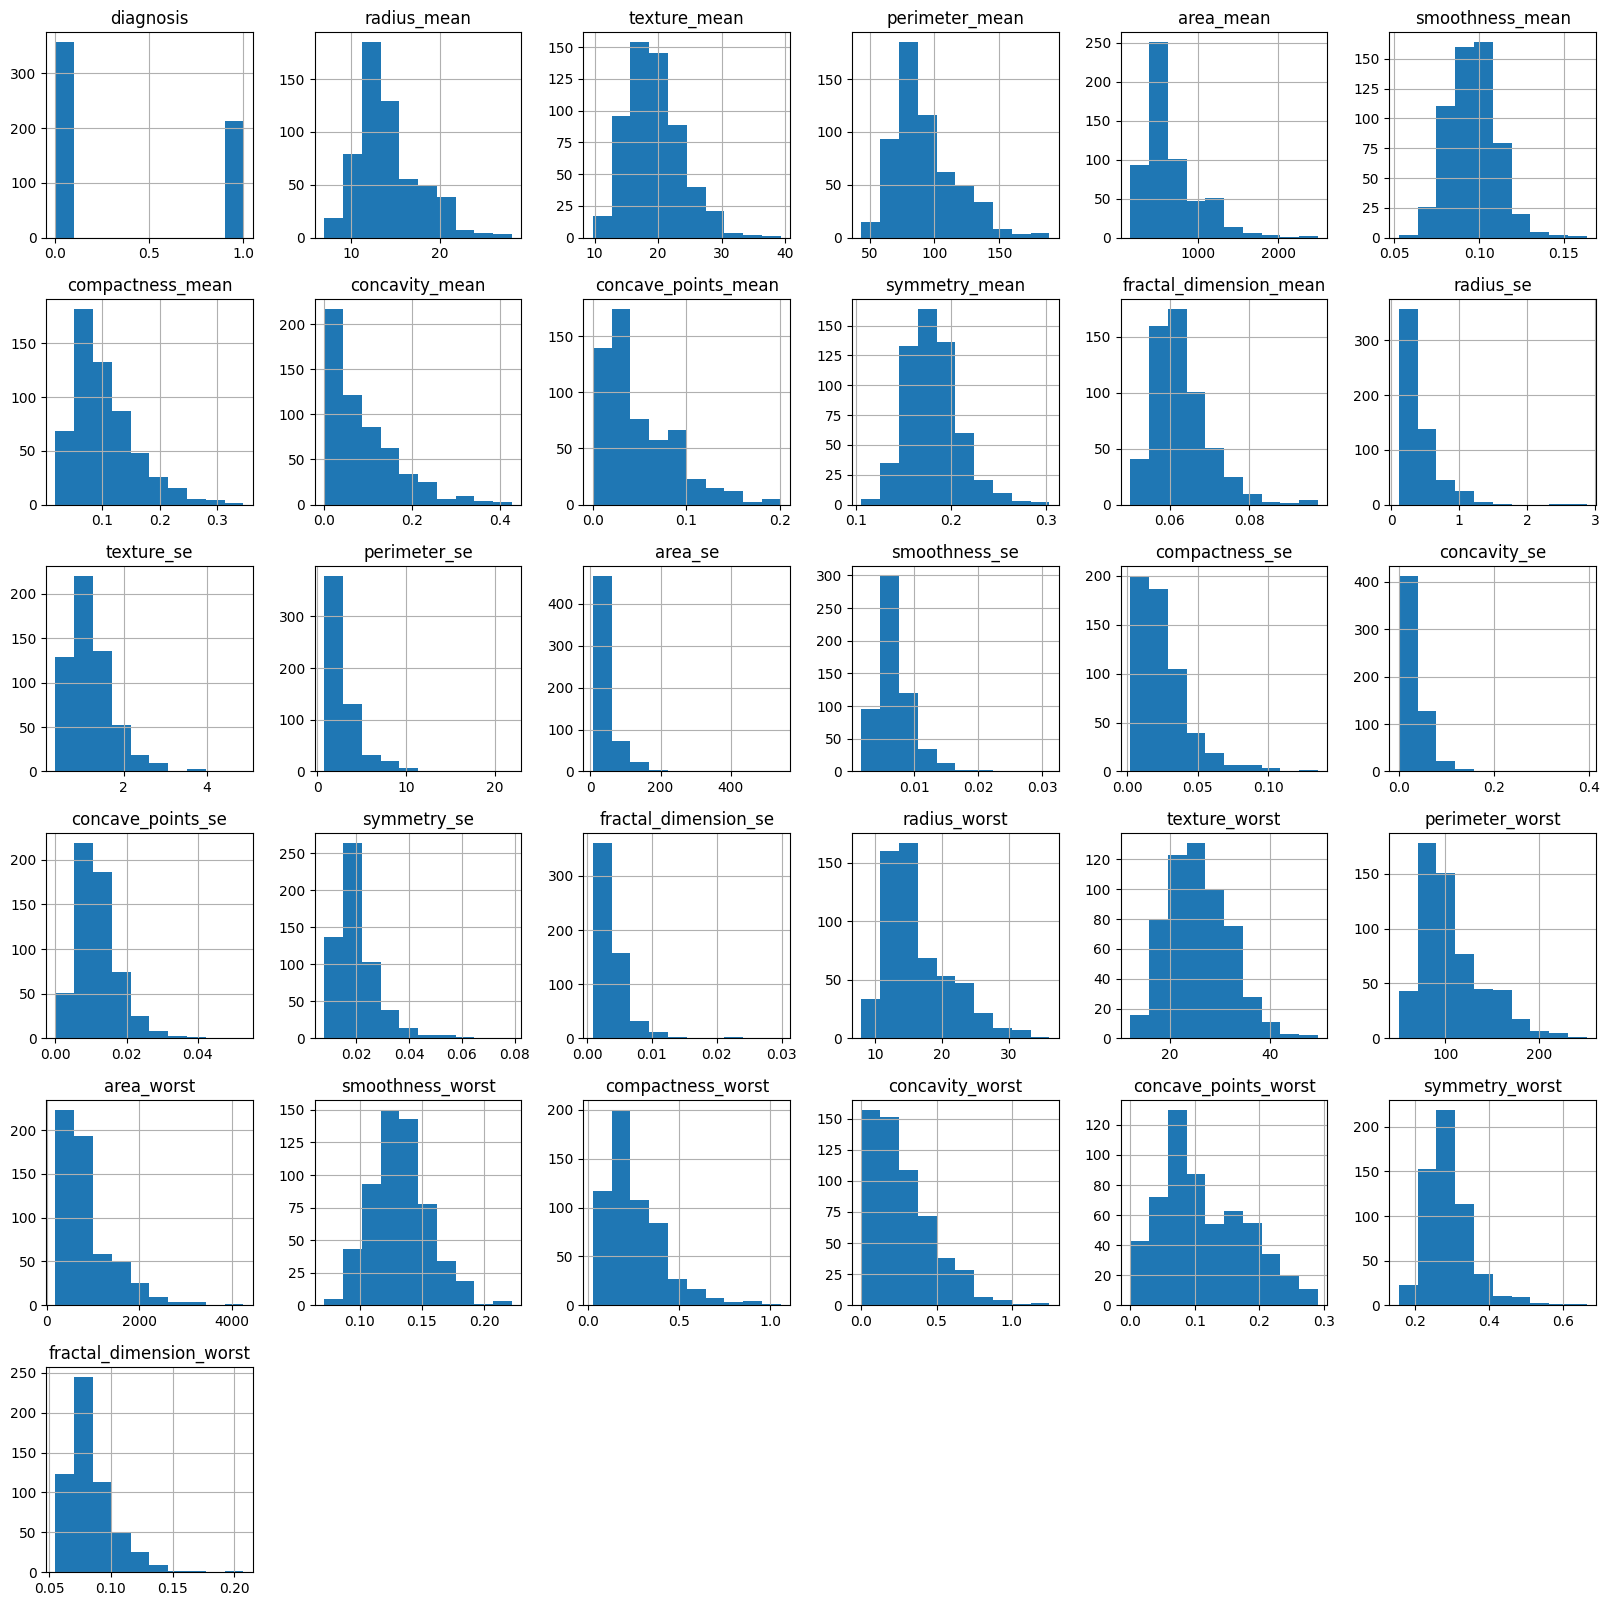

In [82]:
df.hist(figsize=(20, 20))

In [83]:
df.skew()

diagnosis                  0.528461
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave_points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave_points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

You can check the skew of a distribution by checking the relationships between the mean and median. Since there is more weight in the right tail of the distribution (skewness is a value greater than 1), the best distribution for every histogram would be a positive skew. 

In [84]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

The input features would be all of the measurements (columns 3-32). The output column would be the target column (whether or not a tumor is malignant or benign). 

You can quanitify independece/dependence between two random variables by calculating their correlation. Specifically, Pearson's correlation coefficient measure the linear correlation between random variables. 

The correlation of a random variable with iteself is always one but otherwise a Pearson correlation coeffcient of 0 suggests no linear relationship (independent) and a value of 1 suggests a perfect linear relationship (completely dependent). 

In [85]:
print(df.corr(method='pearson'))

                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave_points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.

In [86]:
from scipy.stats import pearsonr

# Identify target column and input columns
target_col = 'diagnosis'
input_cols = [col for col in df.columns if col != target_col]

# Function to calculate correlation and determine independence
def analyze_correlation(feature_data, target_data, threshold=0.3):
    """
    Calculate Pearson correlation coefficient between feature and target
    """
    correlation, p_value = pearsonr(feature_data, target_data)
    
    # Determine independence based on correlation magnitude
    abs_corr = abs(correlation)
    is_independent = abs_corr < threshold
    
    # Classify relationship strength
    if abs_corr < 0.1:
        strength = "Very Weak (Nearly Independent)"
    elif abs_corr < 0.3:
        strength = "Weak"
    elif abs_corr < 0.5:
        strength = "Moderate"
    elif abs_corr < 0.7:
        strength = "Strong"
    else:
        strength = "Very Strong"
    
    return correlation, p_value, is_independent, strength

correlation_results = []

# Analyze each input feature against target
for feature in input_cols:
    # Get data
    feature_data = df[feature].dropna()
    target_data = df.loc[feature_data.index, target_col]
    
    # Calculate correlation
    correlation, p_value, is_independent, strength = analyze_correlation(feature_data, target_data)
    
    # Store results
    correlation_results.append({
        'Feature': feature,
        'Correlation (r)': correlation,
        'Abs Correlation': abs(correlation),
        'P-Value': p_value,
        'Independent': 'Yes' if is_independent else 'No',
        'Relationship': strength,
        'Direction': 'Positive' if correlation > 0 else 'Negative'
    })

# Create summary DataFrame
results_df = pd.DataFrame(correlation_results)
results_df = results_df.sort_values('Abs Correlation', ascending=False)

print("\n" + "=" * 90)
print("SUMMARY TABLE - FEATURE INDEPENDENCE")
print("=" * 90)
print(results_df[['Feature', 'Independent']].to_string(index=False))

print("\n" + "=" * 90)
independence_counts = results_df['Independent'].value_counts()
print(f"Independent features: {independence_counts.get('Yes', 0)}")
print(f"Dependent features: {independence_counts.get('No', 0)}")


SUMMARY TABLE - FEATURE INDEPENDENCE
                Feature Independent
   concave_points_worst          No
        perimeter_worst          No
    concave_points_mean          No
           radius_worst          No
         perimeter_mean          No
             area_worst          No
            radius_mean          No
              area_mean          No
         concavity_mean          No
        concavity_worst          No
       compactness_mean          No
      compactness_worst          No
              radius_se          No
           perimeter_se          No
                area_se          No
          texture_worst          No
       smoothness_worst          No
         symmetry_worst          No
           texture_mean          No
      concave_points_se          No
        smoothness_mean          No
          symmetry_mean          No
fractal_dimension_worst          No
         compactness_se         Yes
           concavity_se         Yes
   fractal_dimension_se   

Target column: diagnosis
Number of input features: 30


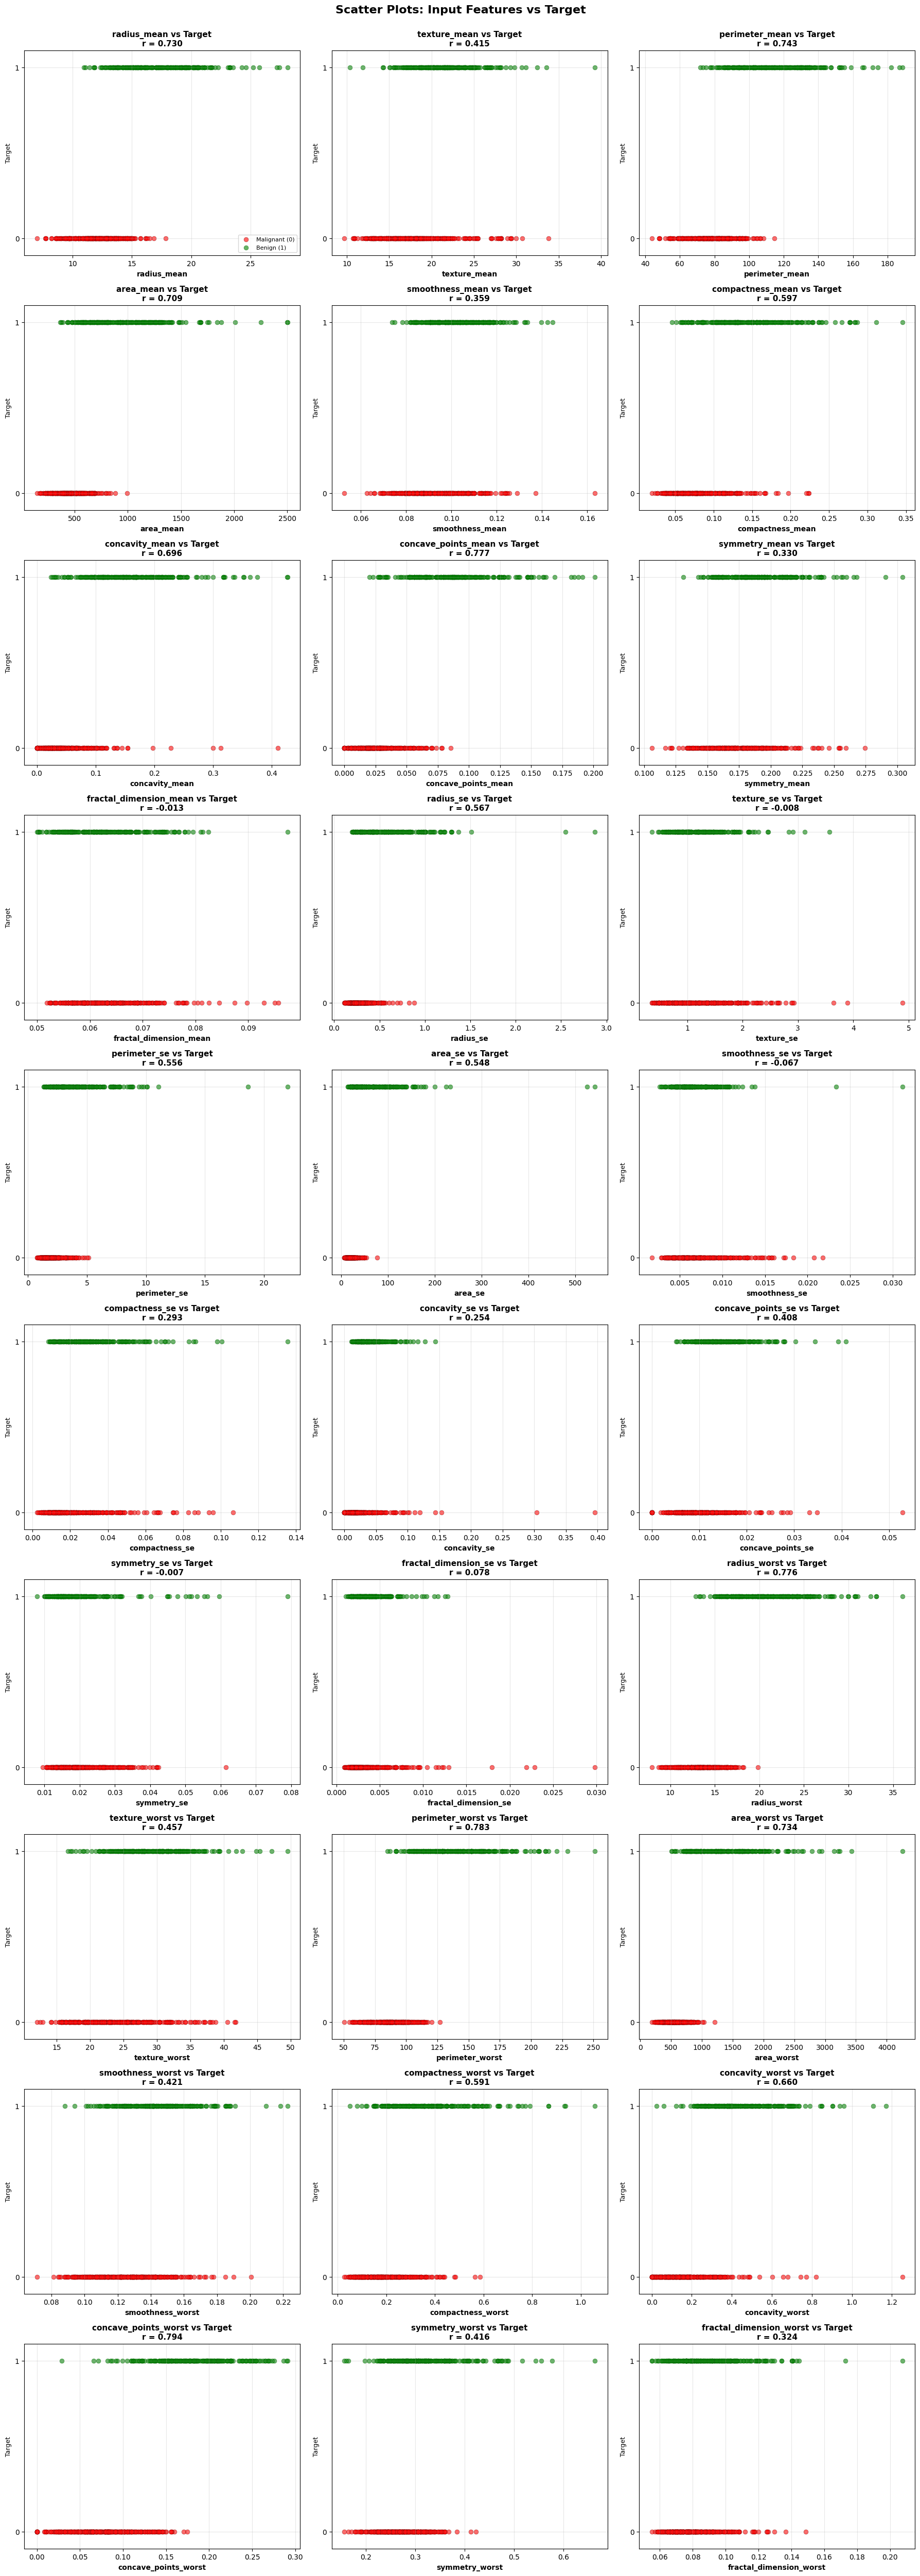

In [87]:
# Identify target column and input columns
target_col = 'diagnosis'
input_cols = [col for col in df.columns if col != target_col]

print(f"Target column: {target_col}")
print(f"Number of input features: {len(input_cols)}")

# Function to calculate correlation and determine independence
def analyze_correlation(feature_data, target_data, threshold=0.3):
    """Calculate Pearson correlation coefficient between feature and target"""
    correlation, p_value = pearsonr(feature_data, target_data)
    abs_corr = abs(correlation)
    is_independent = abs_corr < threshold
    return correlation, is_independent

# Store analysis results
correlation_results = []

# Create scatter plots - 3 columns per row
n_features = len(input_cols)
n_cols_plot = 3
n_rows = (n_features + n_cols_plot - 1) // n_cols_plot
fig, axes = plt.subplots(n_rows, n_cols_plot, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Analyze each input feature against target
for idx, feature in enumerate(input_cols):
    ax = axes[idx]
    
    # Get data
    feature_data = df[feature].dropna()
    target_data = df.loc[feature_data.index, target_col]
    
    # Calculate correlation
    correlation, is_independent = analyze_correlation(feature_data, target_data)
    
    # Create scatter plot - color by target class
    # Malignant (0) = red, Benign (1) = green
    malignant_mask = target_data == 0
    benign_mask = target_data == 1
    
    ax.scatter(feature_data[malignant_mask], target_data[malignant_mask], 
               alpha=0.6, s=40, c='red', edgecolors='darkred', linewidth=0.5, label='Malignant (0)')
    ax.scatter(feature_data[benign_mask], target_data[benign_mask], 
               alpha=0.6, s=40, c='green', edgecolors='darkgreen', linewidth=0.5, label='Benign (1)')
    
    ax.set_xlabel(feature, fontsize=10, fontweight='bold')
    ax.set_ylabel('Target', fontsize=9)
    ax.set_title(f'{feature} vs Target\nr = {correlation:.3f}', fontsize=11, fontweight='bold')
    ax.set_ylim([-0.1, 1.1])
    ax.set_yticks([0, 1])
    ax.grid(True, alpha=0.3)
    
    # Add legend to first plot only
    if idx == 0:
        ax.legend(loc='best', fontsize=8)
    
    # Store results
    correlation_results.append({
        'Feature': feature,
        'Independent': 'Yes' if is_independent else 'No'
    })

# Remove extra subplots
for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Scatter Plots: Input Features vs Target', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()
plt.savefig('scatterplots_features_vs_target.png', dpi=300, bbox_inches='tight')
plt.show()

From the plots, you see which pair of input and output columns are independent or dependent. Features that seperate the two classes (0 vs 1) well are considered to be dependent. Features where the two classes (0 vs 1) overlap more are considered independent of the target feature. There are 7 independent features and 23 dependent ones. 

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

OLS is used to estimate the paramters of a linear regression model by minimixing the sum of squared residuals between observed and predicted values. 

In [88]:
"""# YOUR CODE HERE
import statsmodels.api as sm

x = df.drop('diagnosis', axis=1)
y = df["diagnosis"]

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())"""

'# YOUR CODE HERE\nimport statsmodels.api as sm\n\nx = df.drop(\'diagnosis\', axis=1)\ny = df["diagnosis"]\n\nx = sm.add_constant(x)\nmodel = sm.OLS(y, x).fit()\nprint(model.summary())'

In [89]:
from sklearn.linear_model import LinearRegression

# Identify target column and input columns
target_col = 'diagnosis'
input_cols = [col for col in df.columns if col != target_col]

# Prepare data
X = df[input_cols]
y = df[target_col]

# Create and fit the model
ols_model = LinearRegression()
ols_model.fit(X, y)

y_pred = ols_model.predict(X)

In [90]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"R-squared (R²): {r2:.6f}")


Mean Squared Error (MSE): 0.052755
R-squared (R²): 0.774325



Plots saved as 'ols_regression_results.png'


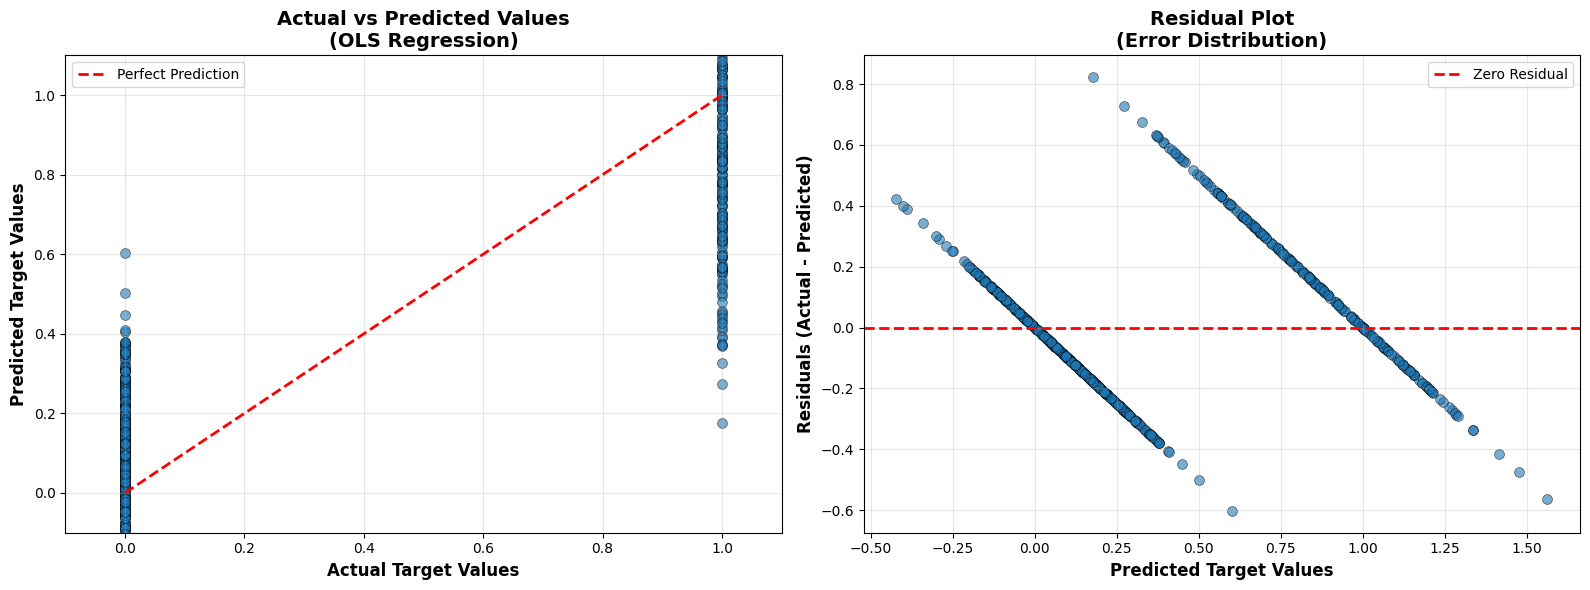

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Scatter plot of Actual vs Predicted
ax1 = axes[0]
ax1.scatter(y, y_pred, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Target Values', fontsize=12, fontweight='bold')
ax1.set_ylabel('Predicted Target Values', fontsize=12, fontweight='bold')
ax1.set_title('Actual vs Predicted Values\n(OLS Regression)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xlim([-0.1, 1.1])
ax1.set_ylim([-0.1, 1.1])


# Plot 2: Residuals plot (Actual - Predicted)
ax2 = axes[1]
residuals = y - y_pred
ax2.scatter(y_pred, residuals, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax2.axhline(y=0, color='r', linestyle='--', lw=2, label='Zero Residual')
ax2.set_xlabel('Predicted Target Values', fontsize=12, fontweight='bold')
ax2.set_ylabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
ax2.set_title('Residual Plot\n(Error Distribution)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)


plt.tight_layout()
plt.savefig('ols_regression_results.png', dpi=300, bbox_inches='tight')
print("\nPlots saved as 'ols_regression_results.png'")
plt.show()

The plots will clearly show how close the predictions are to the actual values, with points near the red diagonal line indicating good predictions. Since the target is binary (0 or 1), we see clustering around those values in the actual data!

The output shows us that the regression model has a R-squared of 0.774 meaning that it fits the data decently well. You can tell which variables are significant based on their p-value. 

In [92]:
"""# --- Calculate the predicted values ---
predicted_y = model.predict(x)

# --- Plotting Actual vs. Predicted Outputs ---
plt.figure(figsize=(10, 8))

# Scatter plot of Actual vs. Predicted
plt.scatter(predicted_y, y, alpha=0.6, label='Actual vs. Predicted')

# Add the line of perfect agreement (y=x)
# This line shows where a perfect prediction would lie.
min_val = min(y.min(), predicted_y.min())
max_val = max(y.max(), predicted_y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Fit ($y=x$)')

# Labeling and saving the plot
plt.title('Actual Values vs. Predicted Outputs')
plt.xlabel('Predicted Output')
plt.ylabel('Actual Value')
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_predicted_plot.png')"""

"# --- Calculate the predicted values ---\npredicted_y = model.predict(x)\n\n# --- Plotting Actual vs. Predicted Outputs ---\nplt.figure(figsize=(10, 8))\n\n# Scatter plot of Actual vs. Predicted\nplt.scatter(predicted_y, y, alpha=0.6, label='Actual vs. Predicted')\n\n# Add the line of perfect agreement (y=x)\n# This line shows where a perfect prediction would lie.\nmin_val = min(y.min(), predicted_y.min())\nmax_val = max(y.max(), predicted_y.max())\nplt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Fit ($y=x$)')\n\n# Labeling and saving the plot\nplt.title('Actual Values vs. Predicted Outputs')\nplt.xlabel('Predicted Output')\nplt.ylabel('Actual Value')\nplt.legend()\nplt.grid(True)\nplt.savefig('actual_vs_predicted_plot.png')"

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [93]:

# Identify target column and input columns

target_col = 'diagnosis'
input_cols = [col for col in df.columns if col != target_col]


# Prepare data
X_all = df[input_cols]
y = df[target_col]

# ============================================================================
# PROBLEM 5: Build OLS model with ALL input columns
# ============================================================================
print("\n" + "=" * 90)
print("PROBLEM 5: OLS REGRESSION WITH ALL INPUT COLUMNS")
print("=" * 90)

ols_all = LinearRegression()
ols_all.fit(X_all, y)
y_pred_all = ols_all.predict(X_all)

mse_all = mean_squared_error(y, y_pred_all)
rmse_all = np.sqrt(mse_all)
r2_all = r2_score(y, y_pred_all)

print(f"\nModel with ALL features:")
print(f"  Number of features: {len(input_cols)}")
print(f"  Mean Squared Error (MSE): {mse_all:.6f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_all:.6f}")
print(f"  R-squared (R²): {r2_all:.6f}")


# Test each feature individually
single_feature_results = []

for feature in input_cols:
    # Prepare single feature data
    X_single = df[[feature]]
    
    # Build model with single feature
    model = LinearRegression()
    model.fit(X_single, y)
    y_pred_single = model.predict(X_single)
    
    # Calculate metrics
    mse = mean_squared_error(y, y_pred_single)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred_single)
    
    # Store results
    single_feature_results.append({
        'Feature': feature,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'Coefficient': model.coef_[0],
        'Intercept': model.intercept_
    })

# Create DataFrame and sort by MSE (lower is better)
results_df = pd.DataFrame(single_feature_results)
results_df = results_df.sort_values('MSE', ascending=True)

# Get the best single feature
best_feature = results_df.iloc[0]['Feature']
best_mse = results_df.iloc[0]['MSE']
best_rmse = results_df.iloc[0]['RMSE']
best_r2 = results_df.iloc[0]['R²']
best_coef = results_df.iloc[0]['Coefficient']
best_intercept = results_df.iloc[0]['Intercept']

print("\n" + "=" * 90)
print("BEST SINGLE FEATURE MODEL")
print("=" * 90)
print(f"Feature: {best_feature}")
print(f"Mean Squared Error (MSE): {best_mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {best_rmse:.6f}")
print(f"R-squared (R²): {best_r2:.6f}")
print(f"Coefficient: {best_coef:.6f}")
print(f"Intercept: {best_intercept:.6f}")
print(f"Model equation: target = {best_intercept:.4f} + {best_coef:.4f} * {best_feature}")


PROBLEM 5: OLS REGRESSION WITH ALL INPUT COLUMNS

Model with ALL features:
  Number of features: 30
  Mean Squared Error (MSE): 0.052755
  Root Mean Squared Error (RMSE): 0.229685
  R-squared (R²): 0.774325

BEST SINGLE FEATURE MODEL
Feature: concave_points_worst
Mean Squared Error (MSE): 0.086552
Root Mean Squared Error (RMSE): 0.294198
R-squared (R²): 0.629747
Coefficient: 5.842190
Intercept: -0.296968
Model equation: target = -0.2970 + 5.8422 * concave_points_worst


Input column 29 (Concavity Worst) is best linear model of the target on it's own with the lowest MSE and highest R^2 values in comparison to the other features. A higher R-squared value indicates that a larger proportion of the variance in the target variable is explained by the input column, suggesting a better fit of the model. In comprison to the previous problem, it appears that the OLS Regression with al input columns has a lower MSE and higher R-sqaured value. This suggests that combining all of the features gives us a better model fit. 

In [94]:
print(results_df)

                    Feature       MSE      RMSE        R²  Coefficient  \
27     concave_points_worst  0.086552  0.294198  0.629747     5.842190   
22          perimeter_worst  0.090478  0.300795  0.612955     0.011275   
7       concave_points_mean  0.092775  0.304589  0.603129     9.685305   
20             radius_worst  0.092833  0.304685  0.602880     0.077741   
2            perimeter_mean  0.104842  0.323793  0.551508     0.014790   
23               area_worst  0.107883  0.328455  0.538499     0.000624   
0               radius_mean  0.109182  0.330427  0.532942     0.100247   
3                 area_mean  0.116261  0.340971  0.502658     0.000975   
6            concavity_mean  0.120408  0.346999  0.484917     4.227067   
26          concavity_worst  0.132057  0.363397  0.435086     1.530010   
5          compactness_mean  0.150579  0.388045  0.355852     5.465978   
25        compactness_worst  0.152116  0.390020  0.349279     1.817726   
10                radius_se  0.158577 

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

In [95]:

# Identify target column and input columns
target_col = 'diagnosis'
input_cols = [col for col in df.columns if col != target_col]


# Calculate pairwise correlations
correlation_pairs = []

for i, col1 in enumerate(input_cols):
    for j, col2 in enumerate(input_cols):
        if i < j:  # Only upper triangle to avoid duplicates
            corr, p_value = pearsonr(df[col1], df[col2])
            correlation_pairs.append({
                'Column 1': col1,
                'Column 2': col2,
                'Correlation': corr,
                'Abs Correlation': abs(corr)
            })

# Sort by absolute correlation
corr_df = pd.DataFrame(correlation_pairs)
corr_df = corr_df.sort_values('Abs Correlation', ascending=False)

# Pick the most correlated pair
col_x = corr_df.iloc[0]['Column 1']
col_y = corr_df.iloc[0]['Column 2']
correlation = corr_df.iloc[0]['Correlation']

print("\n" + "=" * 90)
print(f"SELECTED PAIR WITH VISIBLE DEPENDENCY")
print("=" * 90)
print(f"Column X: {col_x}")
print(f"Column Y: {col_y}")
print(f"Correlation: {correlation:.4f}")


SELECTED PAIR WITH VISIBLE DEPENDENCY
Column X: radius_mean
Column Y: perimeter_mean
Correlation: 0.9979


In [96]:

# Use median as threshold
threshold = df[col_x].median()

print(f"Threshold (t) for {col_x}: {threshold:.4f}")

# Split data
below_threshold = df[df[col_x] < threshold]
above_threshold = df[df[col_x] >= threshold]

print(f"\nData split:")
print(f"  Samples where {col_x} < {threshold:.4f}: {len(below_threshold)} ({len(below_threshold)/len(df)*100:.1f}%)")
print(f"  Samples where {col_x} >= {threshold:.4f}: {len(above_threshold)} ({len(above_threshold)/len(df)*100:.1f}%)")

# Statistics for col_y in each group
print(f"\nStatistics for {col_y}:")
print(f"  When {col_x} < {threshold:.4f}:")
print(f"    Mean: {below_threshold[col_y].mean():.4f}")
print(f"    Std: {below_threshold[col_y].std():.4f}")
print(f"    Min: {below_threshold[col_y].min():.4f}")
print(f"    Max: {below_threshold[col_y].max():.4f}")

print(f"  When {col_x} >= {threshold:.4f}:")
print(f"    Mean: {above_threshold[col_y].mean():.4f}")
print(f"    Std: {above_threshold[col_y].std():.4f}")
print(f"    Min: {above_threshold[col_y].min():.4f}")
print(f"    Max: {above_threshold[col_y].max():.4f}")

mean_diff = above_threshold[col_y].mean() - below_threshold[col_y].mean()
print(f"\n  Difference in means: {mean_diff:.4f}")

Threshold (t) for radius_mean: 13.3700

Data split:
  Samples where radius_mean < 13.3700: 284 (49.9%)
  Samples where radius_mean >= 13.3700: 285 (50.1%)

Statistics for perimeter_mean:
  When radius_mean < 13.3700:
    Mean: 73.6302
    Std: 8.8641
    Min: 43.7900
    Max: 87.5000
  When radius_mean >= 13.3700:
    Mean: 110.2435
    Std: 20.7640
    Min: 85.4800
    Max: 188.5000

  Difference in means: 36.6132


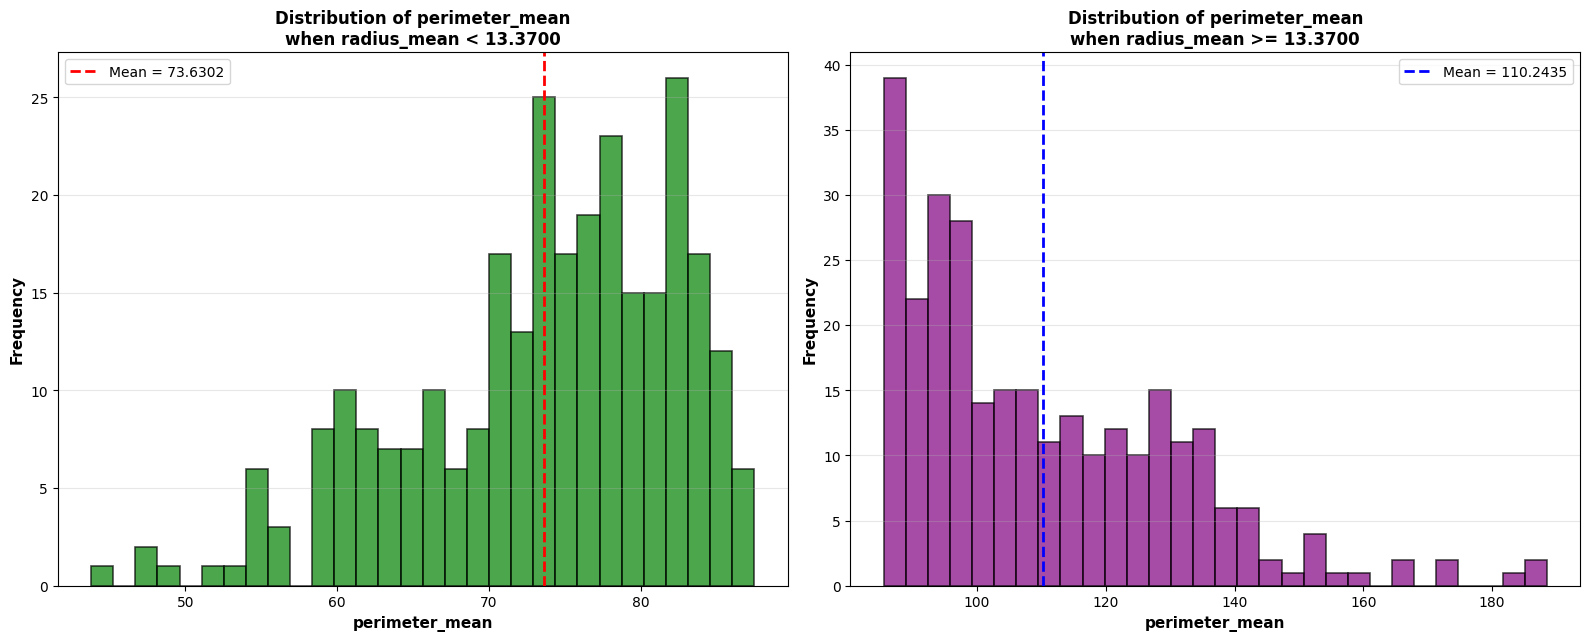

In [97]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Histogram when x < threshold
ax1 = axes[0, 0]
ax1.hist(below_threshold[col_y], bins=30, alpha=0.7, color='green', edgecolor='black', linewidth=1.2)
ax1.axvline(below_threshold[col_y].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {below_threshold[col_y].mean():.4f}')
ax1.set_xlabel(col_y, fontsize=11, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax1.set_title(f'Distribution of {col_y}\nwhen {col_x} < {threshold:.4f}', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Histogram when x >= threshold
ax2 = axes[0, 1]
ax2.hist(above_threshold[col_y], bins=30, alpha=0.7, color='purple', edgecolor='black', linewidth=1.2)
ax2.axvline(above_threshold[col_y].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean = {above_threshold[col_y].mean():.4f}')
ax2.set_xlabel(col_y, fontsize=11, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax2.set_title(f'Distribution of {col_y}\nwhen {col_x} >= {threshold:.4f}', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

for ax in axes.flat:
    if not ax.has_data():  # Check if the subplot contains any plotted data
        fig.delaxes(ax)


plt.tight_layout()
plt.savefig('histograms_split_by_threshold.png', dpi=300, bbox_inches='tight')
plt.show()


These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

You can see how using a threshold split dramatically changed the mean (the differennce in mean is around 36) and standard deviation of each group. 

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

PC  1: Variance = 443782.6051, Ratio = 0.9820 (98.20%), Cumulative = 0.9820 (98.20%)
PC  2: Variance = 7310.1001, Ratio = 0.0162 ( 1.62%), Cumulative = 0.9982 (99.82%)
PC  3: Variance = 703.8337, Ratio = 0.0016 ( 0.16%), Cumulative = 0.9998 (99.98%)
PC  4: Variance =  54.6487, Ratio = 0.0001 ( 0.01%), Cumulative = 0.9999 (99.99%)
PC  5: Variance =  39.8900, Ratio = 0.0001 ( 0.01%), Cumulative = 1.0000 (100.00%)
PC  6: Variance =   3.0046, Ratio = 0.0000 ( 0.00%), Cumulative = 1.0000 (100.00%)
PC  7: Variance =   1.8153, Ratio = 0.0000 ( 0.00%), Cumulative = 1.0000 (100.00%)
PC  8: Variance =   0.3715, Ratio = 0.0000 ( 0.00%), Cumulative = 1.0000 (100.00%)
PC  9: Variance =   0.1555, Ratio = 0.0000 ( 0.00%), Cumulative = 1.0000 (100.00%)
PC 10: Variance =   0.0841, Ratio = 0.0000 ( 0.00%), Cumulative = 1.0000 (100.00%)
PC 11: Variance =   0.0316, Ratio = 0.0000 ( 0.00%), Cumulative = 1.0000 (100.00%)
PC 12: Variance =   0.0075, Ratio = 0.0000 ( 0.00%), Cumulative = 1.0000 (100.00%)
PC 1

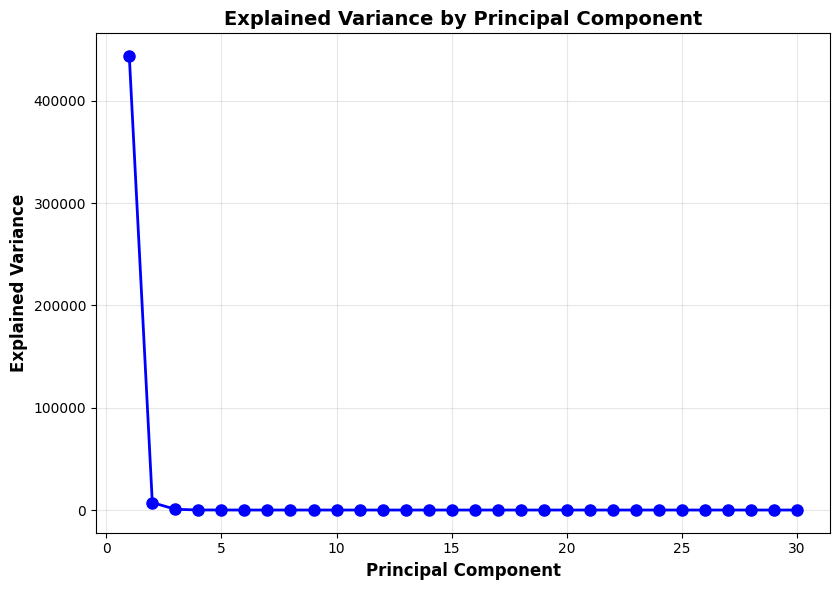

In [98]:

# Identify float columns for PCA
breast_pca_columns = [c for c in df.columns if df[c].dtype == 'float64']

# Fit PCA
breast_pca = PCA()
breast_pca.fit(df[breast_pca_columns].dropna())

# Get components
breast_components = pd.DataFrame(breast_pca.components_, columns=breast_pca_columns)

# Print explained variance for each component
for i, var in enumerate(breast_pca.explained_variance_):
    var_ratio = breast_pca.explained_variance_ratio_[i]
    cumsum = np.sum(breast_pca.explained_variance_ratio_[:i+1])
    print(f"PC {i+1:2d}: Variance = {var:8.4f}, Ratio = {var_ratio:6.4f} ({var_ratio*100:5.2f}%), Cumulative = {cumsum:6.4f} ({cumsum*100:5.2f}%)")

# Plot explained variance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Explained variance
ax1 = axes[0]
ax1.plot(range(1, len(breast_pca.explained_variance_) + 1), breast_pca.explained_variance_, 
         'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Principal Component', fontsize=12, fontweight='bold')
ax1.set_ylabel('Explained Variance', fontsize=12, fontweight='bold')
ax1.set_title('Explained Variance by Principal Component', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

for ax in axes.flat:
    if not ax.has_data():  # Check if the subplot contains any plotted data
        fig.delaxes(ax)

plt.tight_layout()
plt.savefig('pca_explained_variance.png', dpi=300, bbox_inches='tight')
plt.show()

In [99]:
n_components = len(breast_pca.components_)
n_half = n_components // 2

print(f"First half: {n_half} components")

variance_first_half = np.sum(breast_pca.explained_variance_ratio_[:n_half])
print(f"\nVariance explained by first {n_half} components: {variance_first_half:.6f} ({variance_first_half*100:.2f}%)")

First half: 15 components

Variance explained by first 15 components: 1.000000 (100.00%)


In [100]:
# Transform data to principal components
X_pca_full = breast_pca.transform(df[breast_pca_columns].dropna())

# Use only first half of components
X_pca_half = X_pca_full[:, :n_half]

# Build linear regression model with PCA features
pca_model = LinearRegression()
pca_model.fit(X_pca_half, y)
y_pred_pca = pca_model.predict(X_pca_half)

# Calculate metrics
mse_pca = mean_squared_error(y, y_pred_pca)
rmse_pca = np.sqrt(mse_pca)
r2_pca = r2_score(y, y_pred_pca)


In [101]:
print(f"\nBaseline Model (All {len(input_cols)} features):")
print(f"  MSE: {mse_baseline:.6f}")

print(f"\nPCA Model (First {n_half} principal components):")
print(f"  MSE: {mse_pca:.6f}")

mse_diff = mse_pca - mse_baseline
mse_pct_change = (mse_diff / mse_baseline) * 100

print(f"\nDifference:")
print(f"  MSE difference: {mse_diff:.6f}")
print(f"  MSE change: {mse_pct_change:+.2f}%")


Baseline Model (All 30 features):
  MSE: 0.052755

PCA Model (First 15 principal components):
  MSE: 0.061110

Difference:
  MSE difference: 0.008355
  MSE change: +15.84%


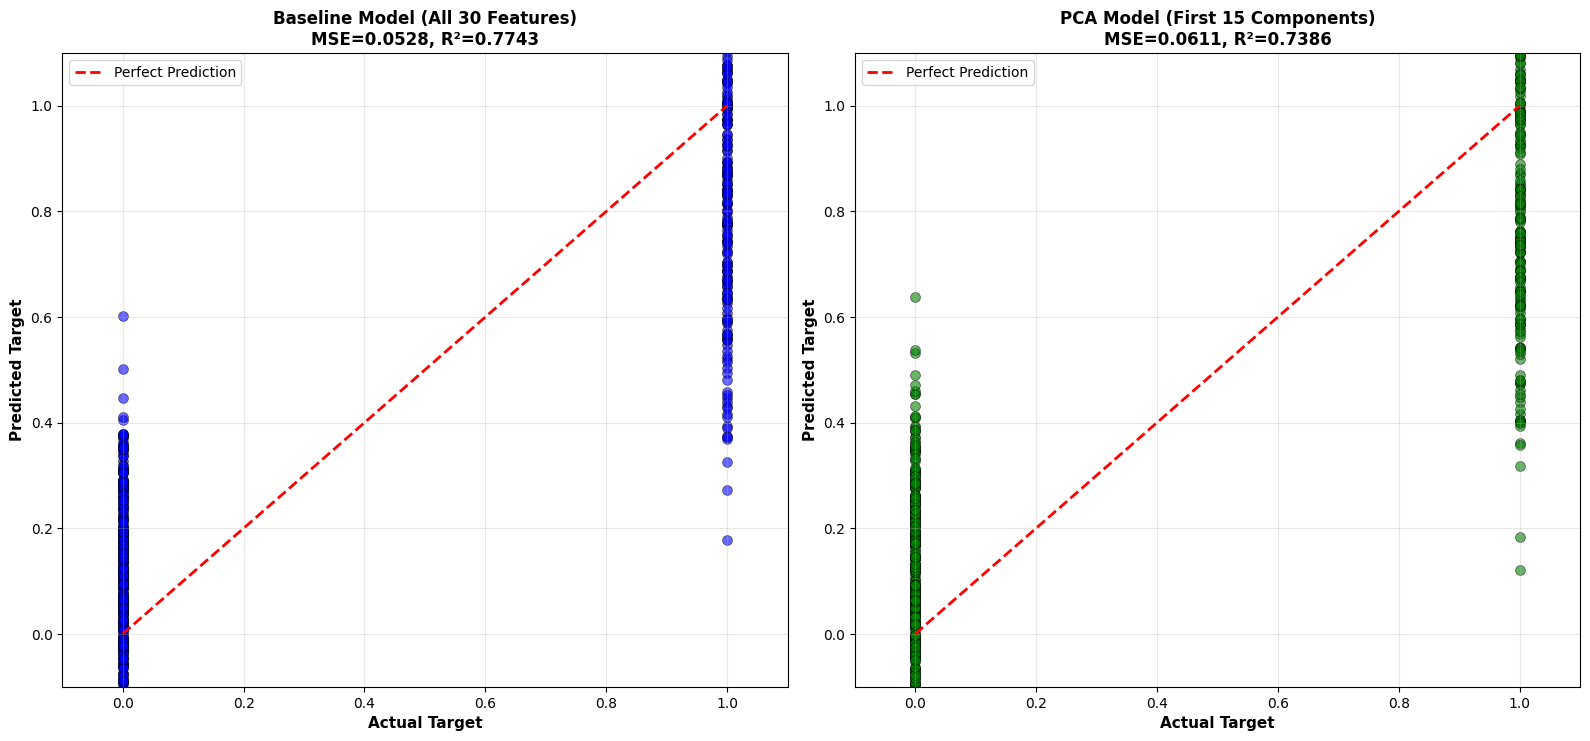

In [102]:
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Plot 1: Baseline Model - Actual vs Predicted
ax1 = axes[0, 0]
ax1.scatter(y, y_pred_baseline, alpha=0.6, s=50, edgecolors='black', linewidth=0.5, c='blue')
ax1.plot([0, 1], [0, 1], 'r--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Target', fontsize=11, fontweight='bold')
ax1.set_ylabel('Predicted Target', fontsize=11, fontweight='bold')
ax1.set_title(f'Baseline Model (All {len(input_cols)} Features)\nMSE={mse_baseline:.4f}, R²={r2_baseline:.4f}', 
              fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim([-0.1, 1.1])
ax1.set_ylim([-0.1, 1.1])

# Plot 2: PCA Model - Actual vs Predicted
ax2 = axes[0, 1]
ax2.scatter(y, y_pred_pca, alpha=0.6, s=50, edgecolors='black', linewidth=0.5, c='green')
ax2.plot([0, 1], [0, 1], 'r--', lw=2, label='Perfect Prediction')
ax2.set_xlabel('Actual Target', fontsize=11, fontweight='bold')
ax2.set_ylabel('Predicted Target', fontsize=11, fontweight='bold')
ax2.set_title(f'PCA Model (First {n_half} Components)\nMSE={mse_pca:.4f}, R²={r2_pca:.4f}', 
              fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim([-0.1, 1.1])
ax2.set_ylim([-0.1, 1.1])

for ax in axes.flat:
    if not ax.has_data():  # Check if the subplot contains any plotted data
        fig.delaxes(ax)

plt.tight_layout()
plt.savefig('comparison_baseline_vs_pca.png', dpi=300, bbox_inches='tight')
plt.show()

It appears that the variance is majorly explained by the first principle component. 

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [103]:
import seaborn as sns

# Identify target column and input columns
target_col = 'diagnosis'
input_cols = [col for col in df.columns if col != target_col]

# Calculate pairwise correlations
correlation_pairs = []

for i, col1 in enumerate(input_cols):
    for j, col2 in enumerate(input_cols):
        if i < j:  # Only upper triangle to avoid duplicates
            corr, p_value = pearsonr(df[col1], df[col2])
            correlation_pairs.append({
                'Column 1': col1,
                'Column 2': col2,
                'Correlation': corr,
                'Abs Correlation': abs(corr)
            })

# Sort by absolute correlation
corr_df = pd.DataFrame(correlation_pairs)
corr_df = corr_df.sort_values('Abs Correlation', ascending=False)

print("\nTop 10 Most Correlated Pairs of Input Columns:")
print(corr_df.head(10).to_string(index=False))

# Get the most correlated pair
col1_name = corr_df.iloc[0]['Column 1']
col2_name = corr_df.iloc[0]['Column 2']
highest_corr = corr_df.iloc[0]['Correlation']

print("")
print(f"HIGHEST CORRELATION PAIR")
print(f"Column 1: {col1_name}")
print(f"Column 2: {col2_name}")
print(f"Correlation: {highest_corr:.6f}")




Top 10 Most Correlated Pairs of Input Columns:
       Column 1        Column 2  Correlation  Abs Correlation
    radius_mean  perimeter_mean     0.997855         0.997855
   radius_worst perimeter_worst     0.993708         0.993708
    radius_mean       area_mean     0.987357         0.987357
 perimeter_mean       area_mean     0.986507         0.986507
   radius_worst      area_worst     0.984015         0.984015
perimeter_worst      area_worst     0.977578         0.977578
      radius_se    perimeter_se     0.972794         0.972794
 perimeter_mean perimeter_worst     0.970387         0.970387
    radius_mean    radius_worst     0.969539         0.969539
 perimeter_mean    radius_worst     0.969476         0.969476

HIGHEST CORRELATION PAIR
Column 1: radius_mean
Column 2: perimeter_mean
Correlation: 0.997855


Columns 2 (Radius Mean) and 4 (Perimeter Mean) have the highest correlation at 0.9978552814938109. 

In [104]:
# ============================================================================
# ANALYZE HOW CORRELATION IS REFLECTED IN PRINCIPAL COMPONENTS
# ============================================================================
print("\n" + "=" * 90)
print("HOW THE HIGHEST CORRELATION IS REFLECTED IN PRINCIPAL COMPONENTS")
print("=" * 90)

# Get loadings for the two highly correlated features
print(f"\nAnalyzing loadings for {col1_name} and {col2_name}:")
print(f"(These two features have correlation: {highest_corr:.6f})")

print("\n" + "-" * 90)
print(f"{'PC':<5} {'Explained Var %':<16} {col1_name:<25} {col2_name:<25} {'Direction':<12}")
print("-" * 90)

for i in range(min(10, len(breast_pca.components_))):
    loading1 = breast_components.loc[i, col1_name]
    loading2 = breast_components.loc[i, col2_name]
    var_explained = breast_pca.explained_variance_ratio_[i] * 100
    
    # Determine if loadings have same direction
    same_direction = (loading1 * loading2) > 0
    direction = "Same" if same_direction else "Opposite"
    
    print(f"{i+1:<5} {var_explained:>6.2f}%{'':<9} {loading1:>10.6f}{'':<15} {loading2:>10.6f}{'':<15} {direction:<12}")

# Calculate cosine similarity of loadings across all PCs
loadings1 = breast_components[col1_name].values
loadings2 = breast_components[col2_name].values

# Dot product of loading vectors
dot_product = np.dot(loadings1, loadings2)
norm1 = np.linalg.norm(loadings1)
norm2 = np.linalg.norm(loadings2)
cosine_similarity = dot_product / (norm1 * norm2)

print("\n" + "=" * 90)
print("LOADING VECTOR ANALYSIS")
print("=" * 90)
print(f"Cosine similarity of loading vectors: {cosine_similarity:.6f}")
print(f"(1.0 = identical directions, -1.0 = opposite directions, 0 = orthogonal)")



HOW THE HIGHEST CORRELATION IS REFLECTED IN PRINCIPAL COMPONENTS

Analyzing loadings for radius_mean and perimeter_mean:
(These two features have correlation: 0.997855)

------------------------------------------------------------------------------------------
PC    Explained Var %  radius_mean               perimeter_mean            Direction   
------------------------------------------------------------------------------------------
1      98.20%            0.005086                  0.035076                Same        
2       1.62%            0.009287                  0.062748                Same        
3       0.16%           -0.012343                 -0.071669                Same        
4       0.01%            0.034238                  0.329281                Same        
5       0.01%           -0.035456                 -0.313383                Same        
6       0.00%            0.131213                  0.840324                Same        
7       0.00%           -0.0335

When two features are highly correlated, PCA will typically give them similar loading magnitudes in the same direction in the dominant principal components, showing that they contribute together to explain variance and represent redundant information that can be compressed!

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

You can use the isolation forest method for outier detection as it is widely used in data science practice. It's an unsupervised machine learning algorithm that identifies outliers by isolating them by recursively generating partitions. The partiitioning process continues until it separates all the data points from the rest of the samples. 

In [105]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(
    contamination=0.05,  # Expect 5% outliers
    random_state=42,
    n_estimators=100
)
outlier_labels = iso_forest.fit_predict(X_scaled)

outlier_rows_iso = outlier_labels == -1
print(f"Contamination parameter: 5%")
print(f"Outlier rows identified: {outlier_rows_iso.sum()}")
print(f"Percentage: {outlier_rows_iso.sum()/len(input_cols)*100:.2f}%")

iso_outlier_indices = input_cols[outlier_rows_iso].index.tolist()
print(f"\nOutlier row indices: {iso_outlier_indices}")

# Get outlier scores (where more negative = more anomalous)
outlier_scores = iso_forest.score_samples(X_scaled)
outlier_scores_df = pd.DataFrame({
    'Index': input_cols.index,
    'Outlier_Score': outlier_scores,
    'Is_Outlier': outlier_rows_iso
}).sort_values('Outlier_Score')

print("\nMost Anomalous Rows:")
print(outlier_scores_df.head(11))

NameError: name 'X_scaled' is not defined

In [ ]:

# Identify target column and input columns
target_col = 'diagnosis'
input_cols = [col for col in df.columns if col != target_col]


outlier_idx = 461
outlier_row = df.iloc[outlier_idx]

print(f"\nRow {outlier_idx} data:")
print(outlier_row)



Row 461 data:
diagnosis                     1.000000
radius_mean                  27.420000
texture_mean                 26.270000
perimeter_mean              186.900000
area_mean                  2501.000000
smoothness_mean               0.108400
compactness_mean              0.198800
concavity_mean                0.363500
concave_points_mean           0.168900
symmetry_mean                 0.206100
fractal_dimension_mean        0.056230
radius_se                     2.547000
texture_se                    1.306000
perimeter_se                 18.650000
area_se                     542.200000
smoothness_se                 0.007650
compactness_se                0.053740
concavity_se                  0.080550
concave_points_se             0.025980
symmetry_se                   0.016970
fractal_dimension_se          0.004558
radius_worst                 36.040000
texture_worst                31.370000
perimeter_worst             251.200000
area_worst                 4254.000000
smoothness

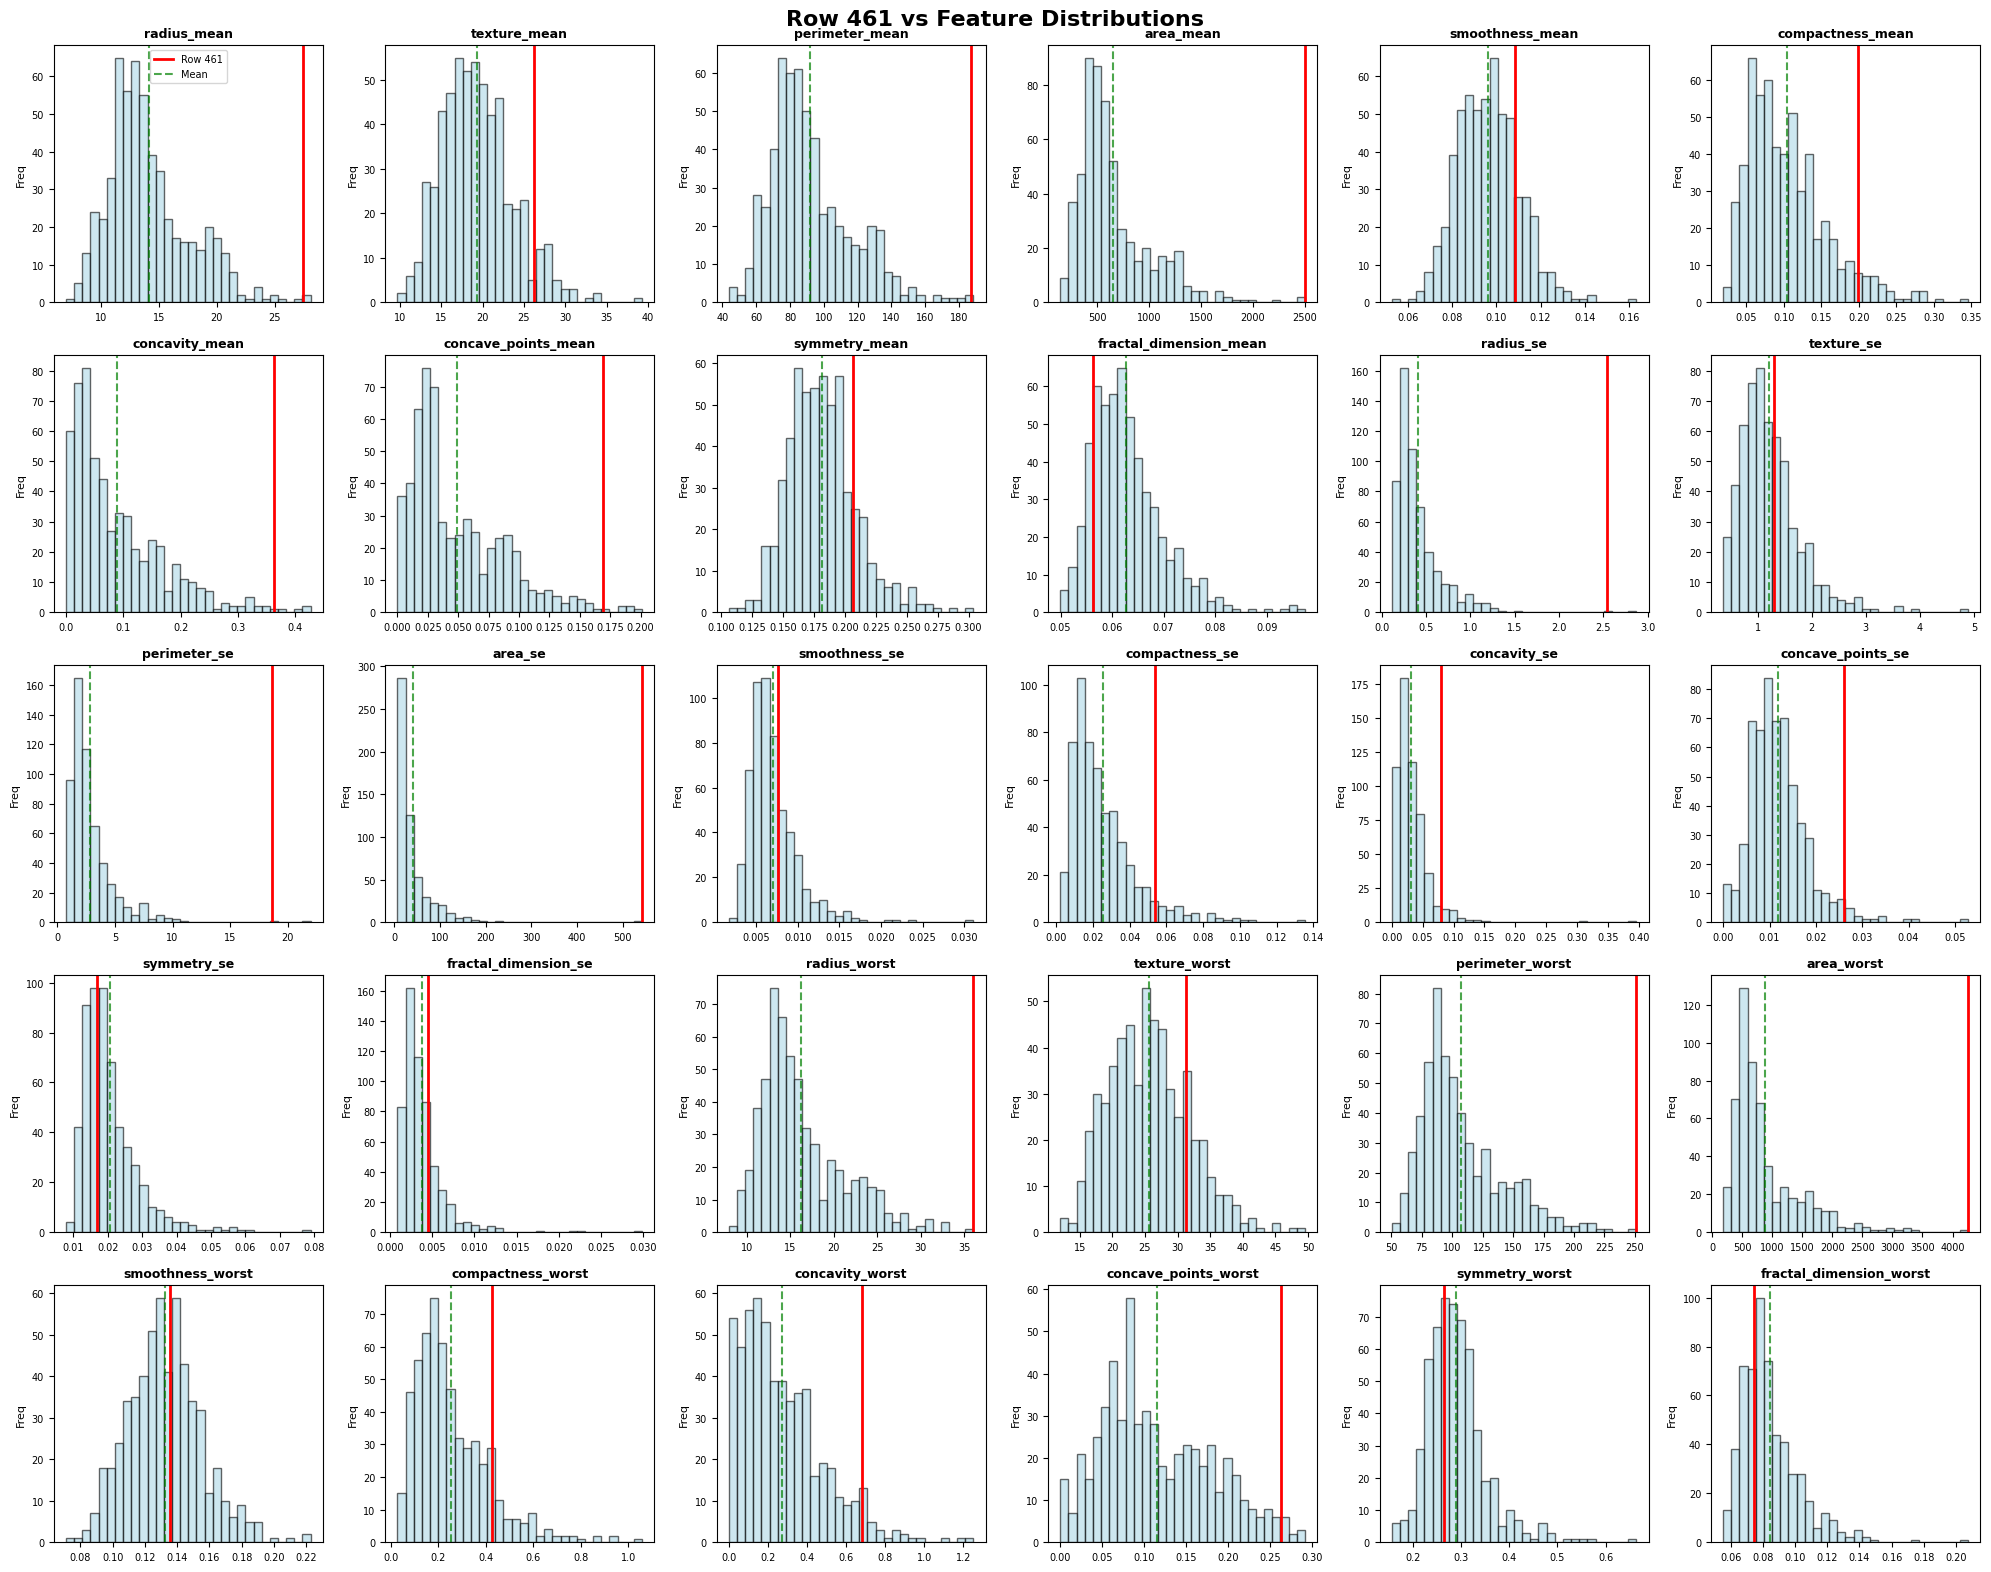

In [ ]:

# Create visualization showing row 461 vs distribution for each feature
fig, axes = plt.subplots(5, 6, figsize=(20, 16))
axes = axes.flatten()

for idx, feature in enumerate(input_cols[:30]):  # Plot first 30 features
    ax = axes[idx]
    
    # Plot histogram of feature
    ax.hist(df[feature], bins=30, alpha=0.6, color='lightblue', edgecolor='black')
    
    # Mark outlier value
    outlier_value = df.iloc[outlier_idx][feature]
    ax.axvline(outlier_value, color='red', linewidth=2, label=f'Row {outlier_idx}')
    
    # Mark mean
    mean_value = df[feature].mean()
    ax.axvline(mean_value, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label='Mean')
    
    ax.set_title(feature, fontsize=9, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Freq', fontsize=8)
    ax.tick_params(labelsize=7)
    
    if idx == 0:
        ax.legend(fontsize=7)

plt.suptitle(f'Row {outlier_idx} vs Feature Distributions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('outlier_row_461_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


You can clearly see from the viusualizations that row 461 represents an unusual case in the dataset. Especially in the viusulizations relating to perimeter, area, and radius, it's depicted that row 461 is isolated in the far right of the graph and away from the main body of data. 

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

NONE